# 第九次作業

In [137]:
# 16.117, 16.127 (also find the outlier(s) and influential observation)
# 16.133 (Use the steps of simple linear regression)
# 17.1, 17.9, 17.15 

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels
import math
import statistics


def Chi_Square_for_Normality(SD, N, a): 
    m = np.mean(SD)
    s = np.std(SD)   
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s 
    counts, bins = np.histogram(SD, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e) 
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
        df = N - 3
        crit_value = stats.chi2.ppf(1 - a, df)
        print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
        return chi_pval
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1     
    # Checking for start of new run 
    for i in range(len(l)): 
        # no. of runs 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
            # print(i, runs)
        # no. of positive values 
        if(l[i]) >= l_median: 
            n1 += 1   
        # no. of negative values 
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z
def c_of_c_test(r, n, a):
    t_value = r * ((n-2)/(1 - r**2)) ** 0.5
    t_critical = stats.t.ppf(1 - a/2, n - 2)
    pval = stats.t.sf(np.abs(t_value), n - 2)*2
    print('r = ', r)
    print('t_critical = ', t_critical)
    print('t = ', t_value)
    print('p_value = ', pval)
    return t_value
def CI_PI_regression(xdata, yval, x1, a):
    print("make CI and PI prediction at mean of x = ", x1)
    X_data_T = xdata.T
    X_data2 = sm.add_constant(X_data_T)
    olsmod = sm.OLS(yval, X_data2)
    result_reg = olsmod.fit()
    y_head = np.dot(result_reg.params, x1)
    print("y_head = ", y_head)
    (t_minus, t_plus) = stats.t.interval(alpha = (1.0 - a), df = result_reg.df_resid )
    core1 = (result_reg.mse_resid * np.matmul(x1, np.linalg.solve(np.matmul(X_data2.T, X_data2), x1))) ** 0.5
    lower_bound = y_head +  t_minus * core1
    upper_bound = y_head +  t_plus * core1
    print("confidence interval of mean = [%0.4f, %0.4f] " % (lower_bound, upper_bound))
    core2 = (result_reg.mse_resid * (1 + np.matmul(x1, np.linalg.solve(np.matmul(X_data2.T, X_data2), x1)))) ** 0.5
    lower_bound2 = y_head +  t_minus * core2
    upper_bound2 = y_head +  t_plus * core2
    print("Prediction interval = [%0.4f, %0.4f] " % (lower_bound2, upper_bound2))
    CI_PI = np.array([lower_bound, upper_bound, lower_bound2, upper_bound2])
    return CI_PI

<div style="background-color:#D9D9D9;"><font size="5"> 16.117</font></div>Calculate and plot the residuals and predicted values
of y for Exercise 16.5

,Temperature,Beers
0,80,20533
1,68,1439
2,78,13829
3,79,21286
4,87,30985


residuals are listed below :
[ 4.34062573e-02 -3.04365412e-01 -1.06587071e+00  7.23854858e-01
  1.16303943e-03  1.86277417e+00  2.40530572e-01 -3.49866867e-01
 -1.89706674e+00  6.99656244e-01]
mu =  -0.004578458896290316
sigma =  0.974316724321476


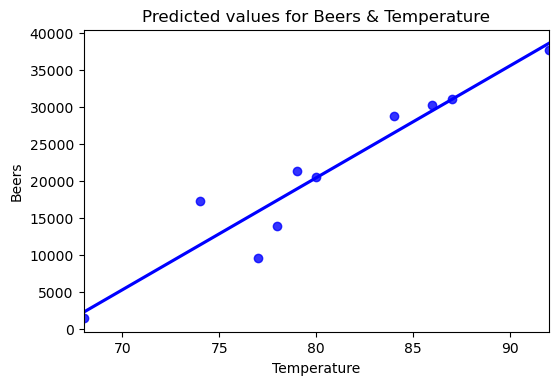

In [139]:
df = pd.read_excel('Xr16-05.xlsx')
display(df.head())
#display(df)
# Fit regression model 
df_result1 = smf.ols('Beers~ Temperature', data=df).fit()
# studentized residual
st1, data1, ss3 = sso.summary_table(df_result1, alpha=0.05)
SD = data1[:, 10]
mu = np.mean(SD)
sigma = np.std(SD)
print("residuals are listed below :")
print(SD)
print('mu = ', mu)
print('sigma = ', sigma)
_ = sns.regplot(x='Temperature', y= 'Beers', data = df, color = 'b', ci = None)
plt.title('Predicted values for Beers & Temperature')
plt.xlabel('Temperature')
plt.ylabel('Beers')
plt.show()

Normality Test <br>
H0: Errors are normally distributed. <br>
H1: Errors are not normally distributed.

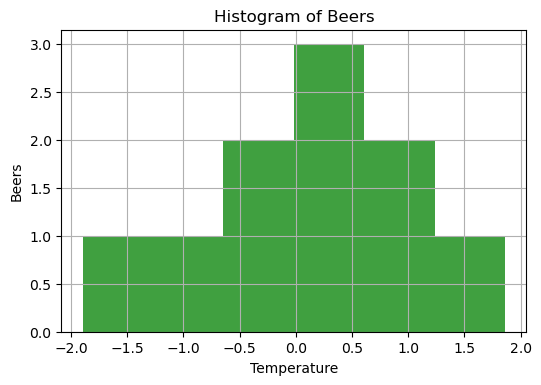

Shapiro Test
Statistics=0.973, p=0.918
Because p_value = 0.918 > a=0.05, do not rejected H0. We can assume that errors are normally distributed.


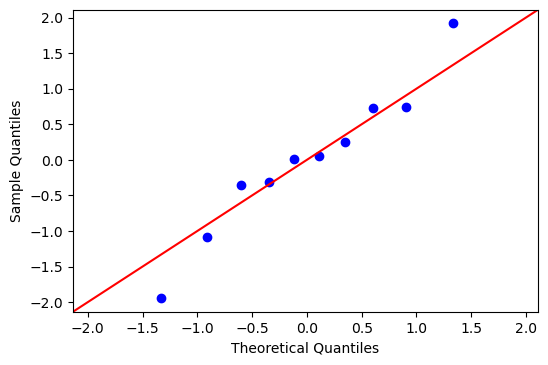

In [140]:
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')

#chi2_pval_here = Chi_Square_for_Normality(SD, 6, 0.05) #rule of 5失敗 換shapiro
#print(chi2_pval_here)
                
print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))
print("Because p_value = 0.918 > a=0.05, do not rejected H0. We can assume that errors are normally distributed.")

Homoscedasticity <br>
H0: When the requirement of a constant variance is not violated<br>
H1: When the requirement of a constant variance is violated

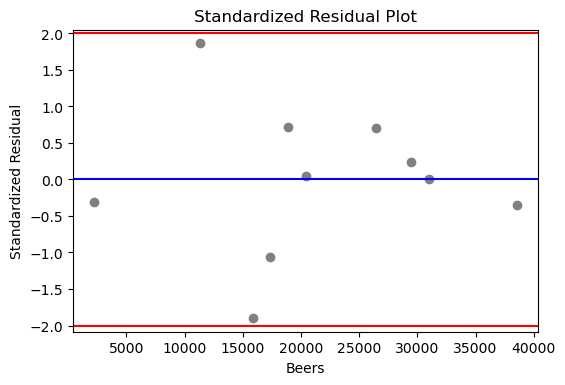

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.


In [141]:
y_pre = data1[:, 2]
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Beers')
plt.ylabel('Standardized Residual')
plt.show()
print("Do not rejected H0. We can assume that the variation is constant and the mean is around 0.")

Dependence of the Error Variable<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

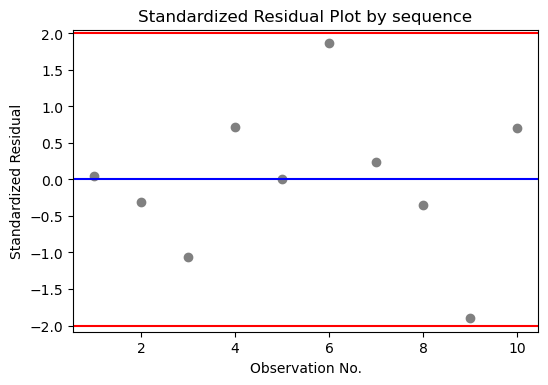

No obvious correlation between sampling sequence and value
runs =  7
n1 =  6
n2 =  5
runs_exp =  6.454545454545454
stan_dev =  1.5587661999529314
z =  0.3499271061118829
pval_z =  0.7263934038022961
p_value for Z-statistic=  0.7263934038022961
Because p-value = 0.34 > a = 0.05, Do not reject H0. There is no evidence to infer that the sample is not random.


In [142]:
Id1 = data1[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot by sequence')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()
print("No obvious correlation between sampling sequence and value")
import math
import statistics

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 
print('p_value for Z-statistic= ', Z_pval)
print("Because p-value = 0.34 > a = 0.05, Do not reject H0. There is no evidence to infer that the sample is not random.")

In [143]:
#outlier(s) and influential observation(s)
df_outliers = pd.DataFrame(SD,columns = ['SD'])
filter = (df_outliers['SD'] < -2) | (df_outliers['SD'] > 2)
print("Outliers by SD = \n")
print(df_outliers['SD'].loc[filter])
print("there is no outliers.We can see from the figure above.")
#Samples 14 and 78 are outliers because their standardized residuals are larger than 2 or smaller than –2.
x_data = df['Temperature'].values
y_data = df['Beers'].values
cov_mat1 = np.cov(y_data, x_data)
x_data_bar = x_data.mean()
data_nobs = len(x_data)
h_val = 1 / data_nobs + (x_data - x_data_bar) ** 2 / (data_nobs - 1) / cov_mat1[1,1]
print(h_val)
df_h = pd.DataFrame(h_val,columns = ['hi'])
filter = (df_h['hi'] > 6 / data_nobs )
print("Influential Observations by hi = \n")
print(df_h['hi'].loc[filter])
print("there is no influential observation(s).")
#Samples 8 and 74 are influential observations because their h’s are larger than 6/n = 0.06.

Outliers by SD = 

Series([], Name: SD, dtype: float64)
there is no outliers.We can see from the figure above.
[0.10057274 0.45796105 0.11431844 0.10515464 0.19679267 0.19679267
 0.16930126 0.40297824 0.12806415 0.12806415]
Influential Observations by hi = 

Series([], Name: hi, dtype: float64)
there is no influential observation(s).


<div style="background-color:#D9D9D9;"><font size="5"> 16.127</font></div>

,Income,Food
0,53,188.24
1,47,304.89
2,59,304.99
3,44,283.99
4,87,316.21


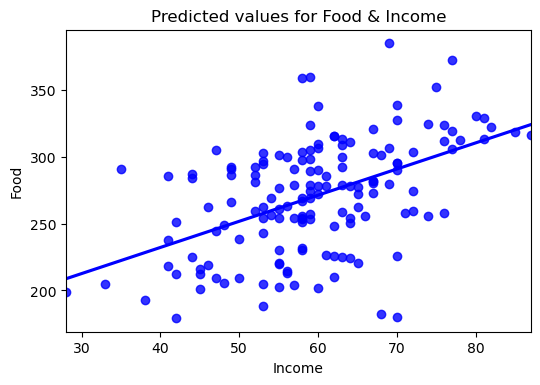

In [144]:
df = pd.read_excel('Xr16-15.xlsx')
display(df.head())
#display(df)
# Fit regression model 
df_result1 = smf.ols('Food~ Income', data=df).fit()
# studentized residual
st1, data1, ss3 = sso.summary_table(df_result1, alpha=0.05)
SD = data1[:, 10]
mu = np.mean(SD)
sigma = np.std(SD)
#print("residuals are listed below :")
#print(SD)
#print('mu = ', mu)
#print('sigma = ', sigma)
_ = sns.regplot(x='Income', y= 'Food', data = df, color = 'b', ci = None)
plt.title('Predicted values for Food & Income')
plt.xlabel('Income')
plt.ylabel('Food')
plt.show()

To test the regression required condition, we need to apply below tests: <br>
Normality Test <br>
H0: Errors are normally distributed. <br>
H1: Errors are not normally distributed.

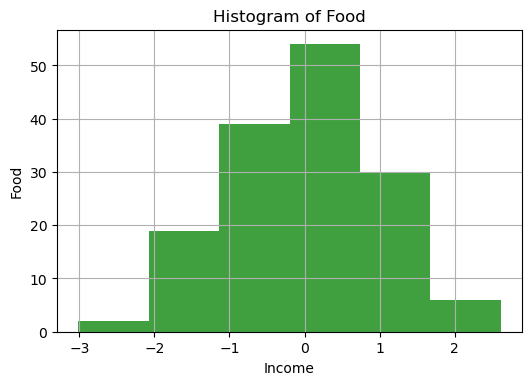

Chi-squared test: statistics = 6.4000, p-value = 0.0937
Critical value = 7.8147 (defree of freedom = 3)
p-value for chisquare test:  0.09369079040762963
Because p_value = 0.093 > a=0.05, do not rejected H0. We can assume that errors are normally distributed.


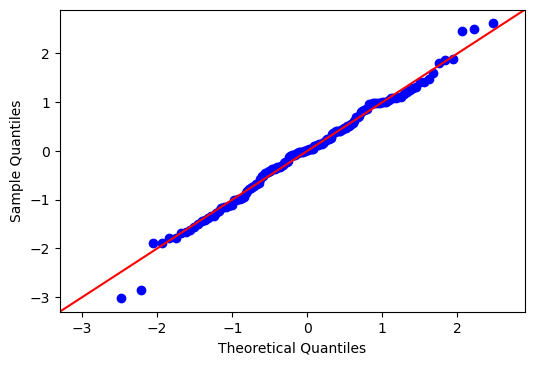

In [145]:
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Income')
plt.ylabel('Food')
plt.title('Histogram of Food')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')

chi2_pval_here = Chi_Square_for_Normality(SD, 6, 0.05) 
print("p-value for chisquare test: ",chi2_pval_here)
                
#print('Shapiro Test')
#stat, p = stats.shapiro(SD)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
print("Because p_value = 0.093 > a=0.05, do not rejected H0. We can assume that errors are normally distributed.")

Homoscedasticity <br>
H0: When the requirement of a constant variance is not violated<br>
H1: When the requirement of a constant variance is violated

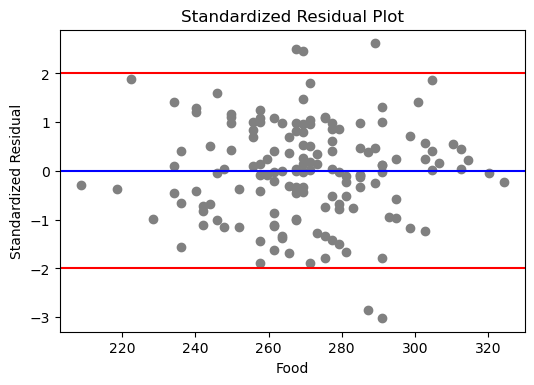

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.


In [146]:
y_pre = data1[:, 2]
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Food')
plt.ylabel('Standardized Residual')
plt.show()
print("Do not rejected H0. We can assume that the variation is constant and the mean is around 0.")

Dependence of the Error Variable<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

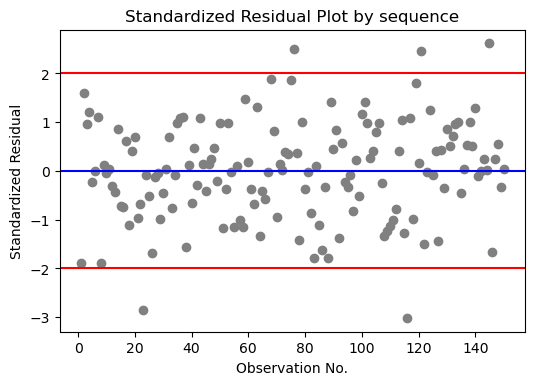

No obvious correlation between sampling sequence and value
runs =  77
n1 =  75
n2 =  76
runs_exp =  76.49668874172185
stan_dev =  6.1233179035675915
z =  0.08219583993587927
pval_z =  0.9344909815035417
p_value for Z-statistic=  0.9344909815035417
Because p-value = 0.93 > a = 0.05, Do not reject H0. There is no evidence to infer that the sample is not random.


In [147]:
Id1 = data1[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot by sequence')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()
print("No obvious correlation between sampling sequence and value")
import math
import statistics

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 
print('p_value for Z-statistic= ', Z_pval)
print("Because p-value = 0.93 > a = 0.05, Do not reject H0. There is no evidence to infer that the sample is not random.")

In [148]:
#outlier(s) and influential observation(s)
df_outliers = pd.DataFrame(SD,columns = ['SD'])
filter = (df_outliers['SD'] < -2) | (df_outliers['SD'] > 2)
print("Outliers by SD = \n")
print(df_outliers['SD'].loc[filter])
#print("there is no outliers.We can see from the figure above.")
print("Samples 22, 75, 115, 120, and 144 are outliers because their standardized residuals are larger than 2 or smaller than –2.")
x_data = df['Income'].values
y_data = df['Food'].values
cov_mat1 = np.cov(y_data, x_data)
x_data_bar = x_data.mean()
data_nobs = len(x_data)
h_val = 1 / data_nobs + (x_data - x_data_bar) ** 2 / (data_nobs - 1) / cov_mat1[1,1]
print(h_val)
df_h = pd.DataFrame(h_val,columns = ['hi'])
filter = (df_h['hi'] > 6 / data_nobs )
print("Influential Observations by hi = \n")
print(df_h['hi'].loc[filter])
#print("there is no influential observation(s).")
print("Samples 4, 9, 41, 51 and 67 are influential observations because their h’s are larger than 6/n.")

Outliers by SD = 

22    -2.860008
75     2.498397
115   -3.015479
120    2.466531
144    2.615022
Name: SD, dtype: float64
Samples 22, 75, 115, 120, and 144 are outliers because their standardized residuals are larger than 2 or smaller than –2.
[0.00906708 0.01565045 0.00667694 0.02051459 0.05096675 0.00734786
 0.00705433 0.00668626 0.01318576 0.04477475 0.00741308 0.00700774
 0.00667694 0.00788832 0.01877673 0.00705433 0.00741308 0.00780445
 0.02466589 0.00987311 0.01588341 0.00788832 0.01095403 0.00837753
 0.00741308 0.00700774 0.01001289 0.01565045 0.0067841  0.0067841
 0.0067841  0.00700774 0.00918822 0.01001289 0.00741308 0.00705433
 0.01299008 0.02433975 0.01318576 0.02433975 0.01201166 0.06416145
 0.00906708 0.00667694 0.02051459 0.00681206 0.00837753 0.01001289
 0.00780445 0.00734786 0.01904696 0.04731864 0.01001289 0.00780445
 0.01183461 0.00987311 0.01565045 0.01426202 0.00667694 0.00668626
 0.01183461 0.01715535 0.01318576 0.00734786 0.00906708 0.01588341
 0.01318576 0.0413

<div style="background-color:#D9D9D9;"><font size="5"> 16.133</font></div>

,Yield,Fetilizer
0,223,100
1,321,200
2,158,300
3,187,400
4,331,500


                            OLS Regression Results                            
Dep. Variable:                  Yield   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     1.772
Date:                Wed, 27 Apr 2022   Prob (F-statistic):              0.194
Time:                        02:44:28   Log-Likelihood:                -169.57
No. Observations:                  30   AIC:                             343.1
Df Residuals:                      28   BIC:                             345.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    281.8000     30.561      9.221      0.0

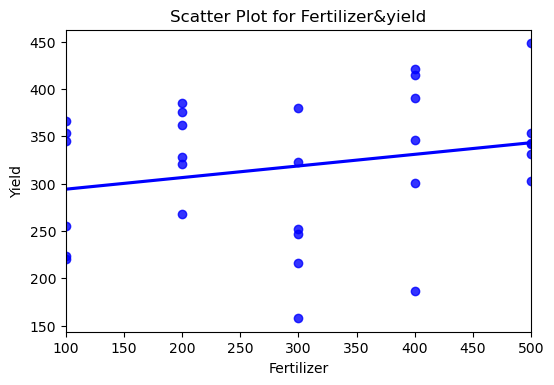

In [149]:
#(a.)
df = pd.read_excel('Xr16-133.xlsx')
display(df.head())
# Fit regression model 
df_result1 = smf.ols('Yield~ Fetilizer', data=df).fit()
# Inspect the results
print(df_result1.summary())

b1 = df_result1.params[1]
b0 = df_result1.params[0]

print(f"\nEstimated model: y = {b0:.4f} + {b1:.4f} x")
print(f"Coefficients : {b0:.4f} and {b1:.4f}")
print("The slope of the line is 0.1227.")
print("It means that for each additional unit of Fertilizer, corn yielded increase by an average of 0.1227.")
_ = sns.regplot(x='Fetilizer', y= 'Yield', data = df, color = 'b', ci = None)
plt.title('Scatter Plot for Fertilizer&yield')
plt.xlabel('Fertilizer')
plt.ylabel('Yield')
plt.show()

test the relationship between corn&fertilizer<br>
H0: r = 0 <br>
H1: r ≠ 0 <br>
r is the  coefficient of correlation between two variables.

In [150]:
#(b.)
#pearson relationship
r, pvalue = stats.pearsonr(df['Yield'], df['Fetilizer'])
print("r = ", r)
print("r^2 = ", r**2)
print("")
cor_mat = np.corrcoef(df[['Yield', 'Fetilizer']].values, rowvar = False)
n = df['Yield'].shape[0]
r_t_value = c_of_c_test(cor_mat[1,0], n,0.05)

r =  0.24397958661729724
r^2 =  0.05952603868594725

r =  0.24397958661729718
t_critical =  2.048407141795244
t =  1.3312484615184808
p_value =  0.19384544458881448


Since the p-value is 0.19 larger than 0.05 significance level, we can't reject the null hypothesis. And show that there's no relationship between two variables.
However, according to the Scatter plot, they have positive relationship rather than negative.
<br><br>
So the relationship test is failed, the agronomist can't use this method and regression line to conclude that there is a linear relationship between the amount of fertilizer and the crop yield

In [151]:
#(c.)
R2 = df_result1.rsquared
print("R2 = ", R2)

R2 =  0.05952603868594697


The coefficient of determination is 0.0595,<br> which means that about 5.95% of the corn yield is explained by the variation of fertilizer. The rest remains unexplained.

#(d.)<br>
because the coefficient of correlation test have failed, there is no significance correlation between the two varibles. Thus, it can't be an useful tool. We may not want to use the model to predict crop yield.

<div style="background-color:#D9D9D9;"><font size="5"> 17.1</font></div>

,Price,Lot size,Trees,Distance
0,105.4,41.2,24,42
1,91.2,44.8,5,71
2,183.3,21.3,72,43
3,93.8,43.9,58,14
4,207.5,57.7,52,12


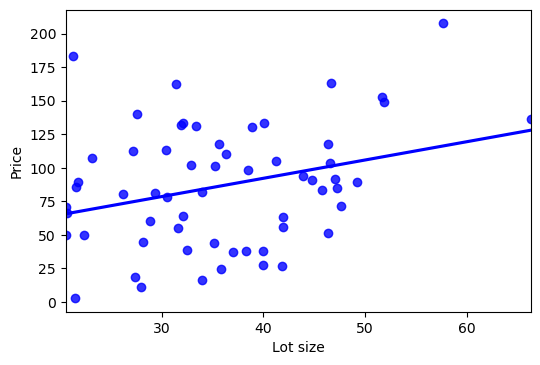

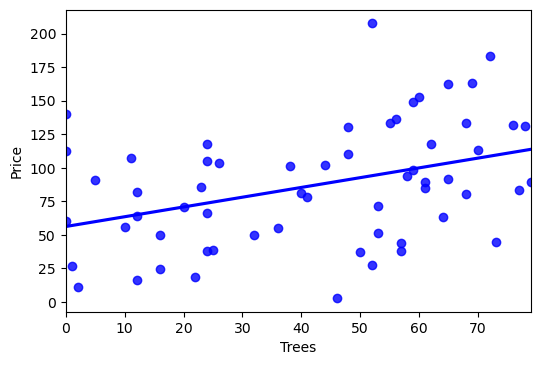

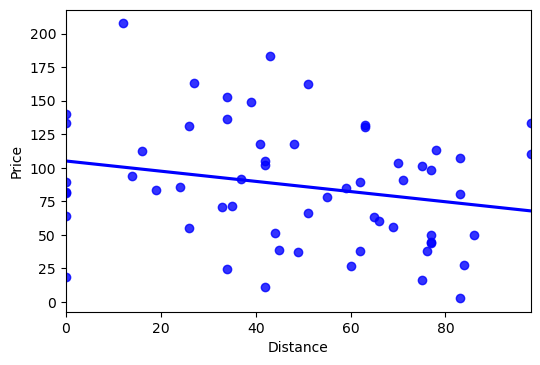

    Price  Lot size  Trees  Distance
0   105.4      41.2     24        42
1    91.2      44.8      5        71
2   183.3      21.3     72        43
3    93.8      43.9     58        14
4   207.5      57.7     52        12
5   130.9      33.4     78        26
6   162.3      31.4     65        51
7    18.8      27.4     22         0
8    80.5      26.2     68        83
9    38.3      40.0     57        76
10   71.3      47.6     53        35
11   55.5      31.6     36        26
12   85.7      21.6     23        24
13  110.5      36.3     48        98
14   85.1      47.2     61        59
15   78.3      30.5     41        55
16   27.2      41.8      1        60
17   70.9      20.6     20        33
18  101.4      35.3     38        75
19  133.3      40.1     68         0
20  117.7      35.6     24        41
21   49.7      20.6     16        77
22   49.6      22.4     32        86
23   83.2      45.8     77        19
24   81.3      29.4     40         0
25  152.5      51.7     60        34
2

,Price,Lot size,Trees,Distance
Price,1.000000,0.303525,0.389063,-0.232614
Lot size,0.303525,1.000000,0.285682,-0.189499
Trees,0.389063,0.285682,1.000000,0.079442
Distance,-0.232614,-0.189499,0.079442,1.000000


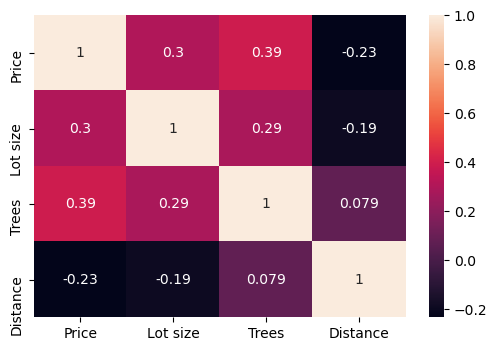

In [5]:
df = pd.read_excel('Xr17-01.xlsx')
display(df.head())
y_var = df['Price'].values
xnames = ['Lot size', 'Trees', 'Distance']
for aname in xnames:
    x_var = df[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Price')
    plt.show()
df_a = df[['Price', 'Lot size', 'Trees', 'Distance']]
print(df_a)
corr1 = df_a.corr() #沒差
display(corr1)
_ = sns.heatmap(corr1, annot=True)

In [8]:
#(a.)
y_data = df['Price']
X_data_ar = np.array([df['Lot size'], df['Trees'], df['Distance']])
print(X_data_ar)
X_data_T = X_data_ar.T
print(X_data_T)
X_data = pd.DataFrame(X_data_T,columns = ['Lot size', 'Trees', 'Distance'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data.astype(float), X_data2.astype(float))
result_reg = olsmod.fit()
print(result_reg.summary())
print("regression equation: ")
print("Price = 51.39 + 0.6999Lot size + 0.6788Trees - 0.3784Distance.")

    Price  Lot size  Trees  Distance
0   105.4      41.2     24        42
1    91.2      44.8      5        71
2   183.3      21.3     72        43
3    93.8      43.9     58        14
4   207.5      57.7     52        12
5   130.9      33.4     78        26
6   162.3      31.4     65        51
7    18.8      27.4     22         0
8    80.5      26.2     68        83
9    38.3      40.0     57        76
10   71.3      47.6     53        35
11   55.5      31.6     36        26
12   85.7      21.6     23        24
13  110.5      36.3     48        98
14   85.1      47.2     61        59
15   78.3      30.5     41        55
16   27.2      41.8      1        60
17   70.9      20.6     20        33
18  101.4      35.3     38        75
19  133.3      40.1     68         0
20  117.7      35.6     24        41
21   49.7      20.6     16        77
22   49.6      22.4     32        86
23   83.2      45.8     77        19
24   81.3      29.4     40         0
25  152.5      51.7     60        34
2

In [154]:
#(b.)
print("standard error of estimate = ", result_reg.mse_resid ** 0.5)

print("mean of y", df_a['Price'].mean())
print("std of y", df_a['Price'].std())
print("")
print("standard error of estimate < mean of y, it means that this model fit the data well. ")

#(c.)
print("from the summary above, we know that the coefficient of determination is 0.242, ")

print("Means that 24.2% of the variation in operating Price is explained by this regression line, the rest remains unexplained.")
#(d.)
print("")
print("The adjusted coefficient of determination is 20.2% is close to 24.2% (smaller than 0.06), ")
print("indicating that the model has not problem of over-fitting.")
print("we use this method to test the samples are large enough for the numbers of variables or not.")

standard error of estimate =  40.24352944532851
mean of y 86.7133333333333
std of y 45.04687752931654

standard error of estimate < mean of y, it means that this model fit the data well. 
from the summary above, we know that the coefficient of determination is 0.242, 
Means that 24.2% of the variation in operating Price is explained by this regression line, the rest remains unexplained.

The adjusted coefficient of determination is 20.2% is close to 24.2% (smaller than 0.06), 
indicating that the model has not problem of over-fitting.
we use this method to test the samples are large enough for the numbers of variables or not.


In [155]:
#(e.)
print("H0: b1 = b2 = … = bk = 0\nH1: At least one bi is not equal to zero.")
print("bi means the coefficient of each variables")

f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

H0: b1 = b2 = … = bk = 0
H1: At least one bi is not equal to zero.
bi means the coefficient of each variables
F value =  5.974883085016509
SSR =  29029.71624918004 df =  3.0 MSR =  9676.572083060013
SSE =  90694.3330841533 df =  56.0 MSE =  1619.5416622170233
F =  5.974883085016509
F test =  <F test: F=array([[5.97488309]]), p=0.0013153712505549868, df_denom=56, df_num=3>


a = 0.05>p-value = 0.001, the null hypothesis is rejected.<br>
There is sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis. At least one of the bi is not equal to zero. <br>
Thus, at least one independent variable is related to y. This regression model is valid.<br>
#### (f.)
Lot size : The relationship between Price and lot size is described by b1 = 0.6999. From this number, we learn that in this model, for each additional unit of lot, price increases on average by 0.6999, assuming that the other independent variables in this model are held constant.<br>

Trees : The relationship between Price and trees is described by b2 = 0.6788. From this number, we learn that in this model, for each additional unit of trees, price increases on average by 0.6788, assuming that the other independent variables in this model are held constant.<br>

Distance : The relationship between Price and Distance is described by b3 = -0.3784. From this number, we learn that in this model, for each additional feet of distance, price decreases on average by 0.3784, assuming that the other independent variables in this model are held constant.

#### (g.)
The hypothesis for each bi is<br>
H0: bi = 0 <br>
H1: bi unequal to 0<br>
from the summary above, we can know that p-value for b2 = 0.004, which is smaller than 0.05, we have enough evidence to reject H0, number of trees is linearly related to the price of the lot in this model.<br>
And for Lot size(b1),p-value =0.216, Distance(b3), p-value =0.058 both > 0.05, we can't reject the null hypothesis.There is not enough evidence to conclude that each of the two variables is linearly related to the Price.

In [156]:
#(h.)
y_data = df['Price']
X_data_ar = np.array([df['Lot size'], df['Trees'], df['Distance']])
#display(X_data_ar)
#display(y_data)
xg = np.array([1,40, 50, 25])
CI_PI_result = CI_PI_regression(X_data_ar, y_data, xg, 0.1)
print(CI_PI_result)
print("It is predicted, with 90% confidence that the interval 35.5 and 172.2, covers the Price for this place.")

make CI and PI prediction at mean of x =  [ 1 40 50 25]
y_head =  103.86903065890235
confidence interval of mean = [91.8599, 115.8782] 
Prediction interval = [35.4979, 172.2402] 
[ 91.85990931 115.87815201  35.49789014 172.24017117]
It is predicted, with 90% confidence that the interval 35.5 and 172.2, covers the Price for this place.


In [157]:
#(i.)
xg = np.array([1,50, 10, 75])
CI_PI_result = CI_PI_regression(X_data_ar, y_data, xg, 0.1)
print(CI_PI_result)
print("It is estimated, with 90% confidence that the interval 39.3 and 90.3, covers the Price for this place.")

make CI and PI prediction at mean of x =  [ 1 50 10 75]
y_head =  64.79751068048543
confidence interval of mean = [39.2909, 90.3041] 
Prediction interval = [-7.1815, 136.7765] 
[ 39.29088536  90.304136    -7.18152651 136.77654787]
It is estimated, with 90% confidence that the interval 39.3 and 90.3, covers the Price for this place.


<div style="background-color:#D9D9D9;"><font size="5"> 17.9</font></div>

,Test Score,Math Degree,Age,Income
0,73.9,77,52,44.4
1,59.4,48,32,49.0
2,64.6,33,50,52.6
3,59.8,25,43,39.6
4,58.8,25,40,40.7


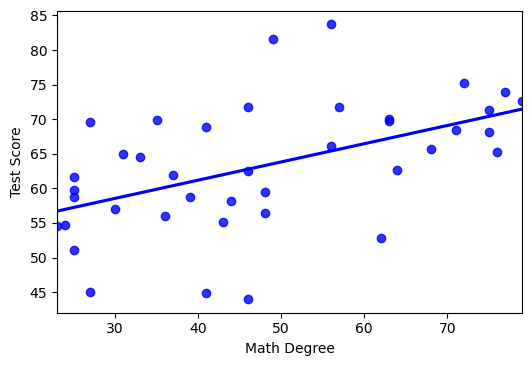

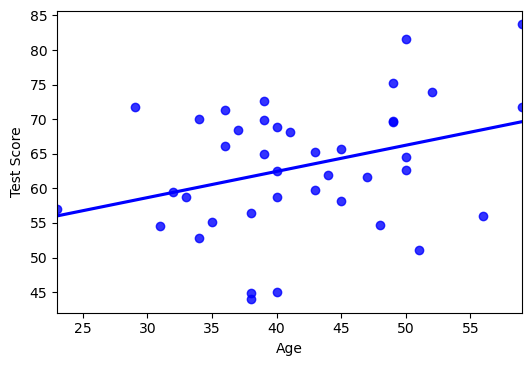

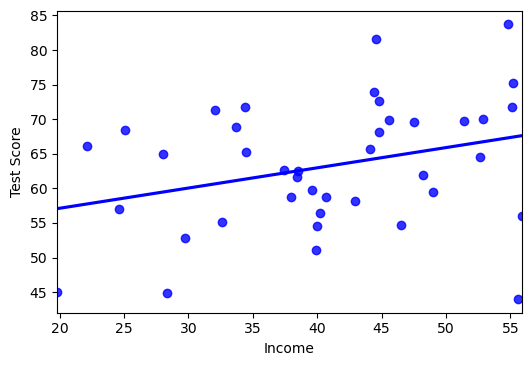

,Test Score,Math Degree,Age,Income
Test Score,1.000000,0.506626,0.332495,0.311981
Math Degree,0.506626,1.000000,0.076597,0.099351
Age,0.332495,0.076597,1.000000,0.569752
Income,0.311981,0.099351,0.569752,1.000000


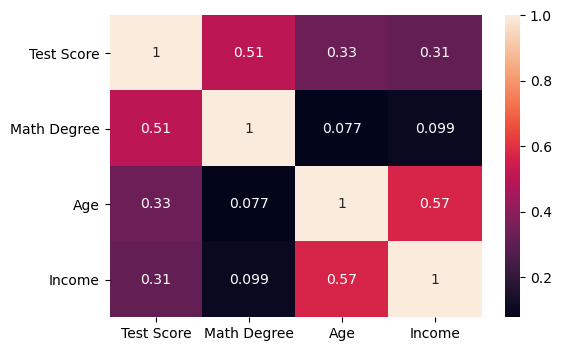

In [158]:
df = pd.read_excel('Xr17-09.xlsx')
display(df.head())
y_var = df['Test Score'].values
xnames = ['Math Degree', 'Age', 'Income']
for aname in xnames:
    x_var = df[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Test Score')
    plt.show()
df_a = df[['Test Score', 'Math Degree', 'Age', 'Income']]
corr1 = df_a.corr() #沒差
display(corr1)
_ = sns.heatmap(corr1, annot=True)

In [159]:
#(a.)
y_data = df['Test Score']
X_data_ar = np.array([df['Math Degree'],df['Age'],df['Income']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['Math Degree', 'Age', 'Income'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())
print("regression equation: ")
print("Test Score = 35.6776 + 0.2475Math Degree + 0.2448Age + 0.1333Income.")

                            OLS Regression Results                            
Dep. Variable:             Test Score   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     6.663
Date:                Wed, 27 Apr 2022   Prob (F-statistic):            0.00108
Time:                        02:44:33   Log-Likelihood:                -136.43
No. Observations:                  40   AIC:                             280.9
Df Residuals:                      36   BIC:                             287.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.6776      7.279      4.902      

In [160]:
#(b.)
print("Test the requirements")
print("standard error of estimate = ", result_reg.mse_resid ** 0.5)
print("mean of y", df_a['Test Score'].mean())
print("std of y", df_a['Test Score'].std())
print("")
print("standard error of estimate < mean of y, it means that this model fit the data well. ")
print("")
print("from the summary above, we know that the coefficient of determination is 0.357, ")
print("Means that 35.7% of the variation in operating Price is explained by this regression line, the rest remains unexplained.")
print("")
print("The adjusted coefficient of determination is 30.3% is close to 35.7% (smaller than 0.06), ")
print("indicating that the model has not problem of over-fitting.")

print("test the validity: ")
print("H0: b1 = b2 = … = bk = 0\nH1: At least one bi is not equal to zero.")
print("bi means the coefficient of each variables")

f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

Test the requirements
standard error of estimate =  7.724526045948261
mean of y 63.214999999999996
std of y 9.255339415294703

standard error of estimate < mean of y, it means that this model fit the data well. 

from the summary above, we know that the coefficient of determination is 0.357, 
Means that 35.7% of the variation in operating Price is explained by this regression line, the rest remains unexplained.

The adjusted coefficient of determination is 30.3% is close to 35.7% (smaller than 0.06), 
indicating that the model has not problem of over-fitting.
test the validity: 
H0: b1 = b2 = … = bk = 0
H1: At least one bi is not equal to zero.
bi means the coefficient of each variables
F value =  6.663125157435007
SSR =  1192.7321051568088 df =  3.0 MSR =  397.57736838560294
SSE =  2148.058894843191 df =  36.0 MSE =  59.668302634533084
F =  6.663125157435007
F test =  <F test: F=array([[6.66312516]]), p=0.0010769247208052384, df_denom=36, df_num=3>


a = 0.05>p-value = 0.001, the null hypothesis is rejected.<br>
There is sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis. At least one of the bi is not equal to zero. <br>
Thus, at least one independent variable is related to y. This regression model is valid.<br>
#### (c.)
University degree in mathematics : The relationship between Test score and the percentage of teachers in each school who have at least one university degree in mathematics is described by b1 = 0.2475. From this number, we learn that in this model, for each additional percentage, Test score increases on average by 0.2475, assuming that the other independent variables in this model are held constant.<br>

Age : The relationship between Test score and Age is described by b2 = 0.2448. From this number, we learn that in this model, for each additional age, test score increases on average by 0.2448, assuming that the other independent variables in this model are held constant.<br>

Income : The relationship between Test score and Income is described by b3 = 0.1333. From this number, we learn that in this model, for each additional Income, Test score increases on average by 0.1333, assuming that the other independent variables in this model are held constant.
<br>
test the coefficients : The hypothesis for each bi is<br>
H0: bi = 0 <br>
H1: bi unequal to 0<br>
from the summary above, we can know that p-value for b1 = 0.001, which is smaller than 0.05, we have enough evidence to reject H0, percentage of teachers having university degree of math is linearly related to the Test score in this model.<br>
And for Age(b2),p-value =0.195, Income(b3), p-value =0.389 both > 0.05, we can't reject the null hypothesis.There is not enough evidence to conclude that each of the two variables is linearly related to the Test score.

In [161]:
#(d.)
xg = np.array([1,50, 43, 48.3])
CI_PI_result = CI_PI_regression(X_data_ar, y_data, xg, 0.05)
print(CI_PI_result)
print("It is predicted, with 95% confidence that the interval 49.0 and 81.0, covers the Test score for this school.")

make CI and PI prediction at mean of x =  [ 1.  50.  43.  48.3]
y_head =  65.0176441859272
confidence interval of mean = [61.7531, 68.2822] 
Prediction interval = [49.0151, 81.0202] 
[61.75312919 68.28215918 49.01506162 81.02022675]
It is predicted, with 95% confidence that the interval 49.0 and 81.0, covers the Test score for this school.


<div style="background-color:#D9D9D9;"><font size="5"> 17.15</font></div>

first transfer the DEFINITE column to boolean:vote=1, no=0.


,DEFINITE,AGE,EDUC,INCOME
0,10,34,13,127500
1,10,58,12,16000
2,10,39,16,32500
3,5,49,12,23500
4,10,72,16,82500


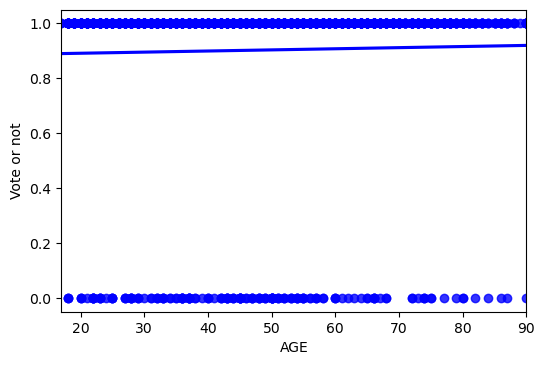

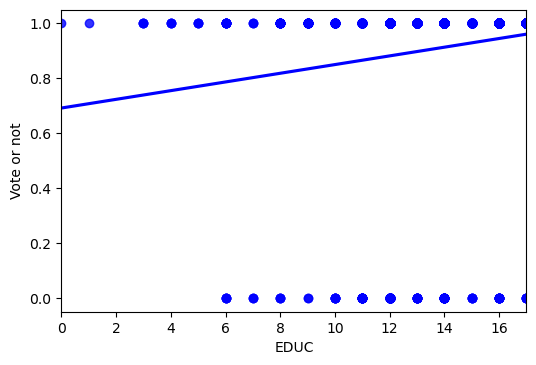

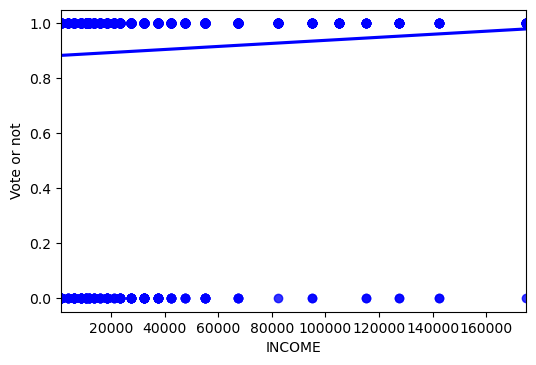

,DEFINITE,AGE,EDUC,INCOME
DEFINITE,1.000000,0.023601,0.133525,0.065136
AGE,0.023601,1.000000,-0.122963,0.043853
EDUC,0.133525,-0.122963,1.000000,0.349744
INCOME,0.065136,0.043853,0.349744,1.000000


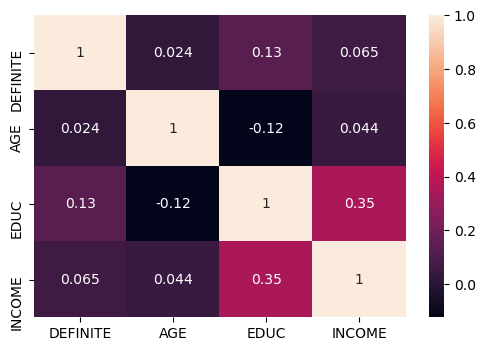

In [162]:
df = pd.read_excel('Xr17-15.xlsx')
print("first transfer the DEFINITE column to boolean:vote=1, no=0.")
display(df.head())
y_var = df['DEFINITE'].values
df['DEFINITE'] = df['DEFINITE'].replace({1: 0})
df['DEFINITE'] = df['DEFINITE'].replace({1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1})
#display(df)
xnames = ['AGE', 'EDUC', 'INCOME']
for aname in xnames:
    x_var = df[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Vote or not')
    plt.show()
df_a = df[['DEFINITE', 'AGE', 'EDUC', 'INCOME']]
corr1 = df_a.corr() #沒差
display(corr1)
_ = sns.heatmap(corr1, annot=True)

In [163]:
#(a.)
y_data = df['DEFINITE']
X_data_ar = np.array([df['AGE'],df['EDUC'],df['INCOME']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['AGE', 'EDUC', 'INCOME'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())
print("regression equation: ")
print("will vote or not =  0.6568 + 0.0007AGE + 0.0157EDUC + 0INCOME.")

                            OLS Regression Results                            
Dep. Variable:               DEFINITE   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     11.11
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           3.20e-07
Time:                        02:44:34   Log-Likelihood:                -321.79
No. Observations:                1662   AIC:                             651.6
Df Residuals:                    1658   BIC:                             673.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6568      0.047     13.964      0.0

In [164]:
#(b.)
print("Test the requirements")
print("standard error of estimate = ", result_reg.mse_resid ** 0.5)
print("mean of y", df_a['DEFINITE'].mean())
print("std of y", df_a['DEFINITE'].std())
print("")
print("standard error of estimate < mean of y, it means that this model fit the data well. ")
print("")
print("from the summary above, we know that the coefficient of determination is 0.02, ")
print("Means that 2% of the variation in voting is explained by this regression line, the rest remains unexplained.")
print("")
print("The adjusted coefficient of determination is 1.8% is close to 2.% (smaller than 0.06), ")
print("indicating that the model has not problem of over-fitting.")
print("")
print("test the validity: ")
print("H0: b1 = b2 = … = bk = 0\nH1: At least one bi is not equal to zero.")
print("bi means the coefficient of each variables")

f_res = result_reg.fvalue
print("F value = ", f_res)
MSE = result_reg.mse_resid
df_model = result_reg.df_model
df_error = result_reg.df_resid
MSR = f_res * MSE
SSR = MSR * df_model
print("SSR = ", SSR, "df = ", df_model, "MSR = ", MSR)
print("SSE = ", MSE * df_error, "df = ", df_error, "MSE = ", MSE)
print("F = ", MSR / MSE)
A = np.identity(len(result_reg.params))
A = A[1:,:]
print("F test = ", result_reg.f_test(A))

Test the requirements
standard error of estimate =  0.2940170745567077
mean of y 0.9025270758122743
std of y 0.2966899332383922

standard error of estimate < mean of y, it means that this model fit the data well. 

from the summary above, we know that the coefficient of determination is 0.02, 
Means that 2% of the variation in voting is explained by this regression line, the rest remains unexplained.

The adjusted coefficient of determination is 1.8% is close to 2.% (smaller than 0.06), 
indicating that the model has not problem of over-fitting.

test the validity: 
H0: b1 = b2 = … = bk = 0
H1: At least one bi is not equal to zero.
bi means the coefficient of each variables
F value =  11.112333737201654
SSR =  2.881851744581752 df =  3.0 MSR =  0.9606172481939173
SSE =  143.3275345370067 df =  1658.0 MSE =  0.08644604013088462
F =  11.112333737201654
F test =  <F test: F=array([[11.11233374]]), p=3.195412064494201e-07, df_denom=1.66e+03, df_num=3>


a = 0.05>p-value = 0.000, the null hypothesis is rejected.<br>
There is sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis. At least one of the bi is not equal to zero. <br>
Thus, at least one independent variable is related to y. This regression model is valid.<br>
#### (c.)

Test to determine whether there is sufficient evidence to infer a linear relationship between the dependent variable and each independent variable : The hypothesis for each bi is<br>
H0: bi = 0 <br>
H1: bi unequal to 0<br>
from the summary above, we can know that p-value for EDUC(b2) = 0.000, which is smaller than 0.05, we have enough evidence to reject H0, education of voters is linearly related to the Voting or not in this model.<br>
And for AGE(b1),p-value =0.112, INCOME(b3), p-value =0.511 both larger than  0.05, we can't reject the null hypothesis.There is not enough evidence to conclude that each of the two variables is linearly related to they will vote or not.